In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
TENANT_NUM = 2
DURATION = 900
LAT_MU = 3
CACHE_SIZE_RATIO = 0.5
ITER = 0

RESULT_DIR = "/home/yunchi/582/resalloc/results/"
ams_df = pd.read_csv(RESULT_DIR + 
    f"lat{LAT_MU}_cr{CACHE_SIZE_RATIO}/selected_data_tenant{TENANT_NUM}_time0-{DURATION}_iter{ITER}_AMShare.csv"
)
glob_df = pd.read_csv(RESULT_DIR +
                      f"lat{LAT_MU}_cr{CACHE_SIZE_RATIO}/selected_data_tenant{TENANT_NUM}_time0-{DURATION}_iter{ITER}_GlobalLRU.csv"
)
maxmin_df = pd.read_csv(RESULT_DIR +
                        f"lat{LAT_MU}_cr{CACHE_SIZE_RATIO}/selected_data_tenant{TENANT_NUM}_time0-{DURATION}_iter{ITER}_Max-Min.csv"
)
memshare_df = pd.read_csv(RESULT_DIR +
                          f"lat{LAT_MU}_cr{CACHE_SIZE_RATIO}/selected_data_tenant{TENANT_NUM}_time0-{DURATION}_iter{ITER}_Memshare.csv"
)

In [3]:
coll_lat = []
coll_hr = []
ind_lat = []
ind_hr = []

In [4]:
tntids = set(ams_df["tntid"])
for base_df in [glob_df, maxmin_df, memshare_df]:
    print("-"*20)
    avg_lat_ams = (ams_df["finish_ts"]-ams_df["issue_ts"]).mean()
    avg_lat_base = (base_df["finish_ts"]-base_df["issue_ts"]).mean()
    print("collective lat_ratio:", avg_lat_ams/avg_lat_base)
    coll_lat.append(avg_lat_ams/avg_lat_base)

    hit_ams = len(ams_df[ams_df["hit"] == True])
    hit_base = len(base_df[base_df["hit"] == True])
    print("collective hitrate_ratio:", hit_ams/hit_base)
    coll_hr.append(hit_ams/hit_base)

    ind_lat.append([])
    ind_hr.append([])
    for t in tntids:
        ams_tdf = ams_df[ams_df["tntid"] == t]
        base_tdf = base_df[base_df["tntid"] == t]
        
        avg_lat_ams = (ams_tdf["finish_ts"]-ams_tdf["issue_ts"]).mean()
        avg_lat_base = (base_tdf["finish_ts"]-base_tdf["issue_ts"]).mean()
        print(t, "lat_ratio:", avg_lat_ams/avg_lat_base)
        ind_lat[-1].append(avg_lat_ams/avg_lat_base)
        
        hit_ams = len(ams_tdf[ams_tdf["hit"] == True])
        hit_base = len(base_tdf[base_tdf["hit"] == True])
        print(t, "hitrate_ratio:", hit_ams/hit_base)
        ind_hr[-1].append(hit_ams/hit_base)

--------------------
collective lat_ratio: 1.0019824620112574
collective hitrate_ratio: 0.9971126082771896
18 lat_ratio: 0.9957270592243003
18 hitrate_ratio: 1.011111111111111
5935 lat_ratio: 1.004869393930002
5935 hitrate_ratio: 0.9941792782305006
--------------------
collective lat_ratio: 0.8974824257243752
collective hitrate_ratio: 1.1935483870967742
18 lat_ratio: 1.002166702800662
18 hitrate_ratio: 0.994535519125683
5935 lat_ratio: 0.8565645086052892
5935 hitrate_ratio: 1.2467153284671533
--------------------
collective lat_ratio: 0.9351729898301726
collective hitrate_ratio: 1.1092077087794432
18 lat_ratio: 1.0063881524146758
18 hitrate_ratio: 0.9837837837837838
5935 lat_ratio: 0.9058587006182746
5935 hitrate_ratio: 1.1401869158878504


<BarContainer object of 3 artists>

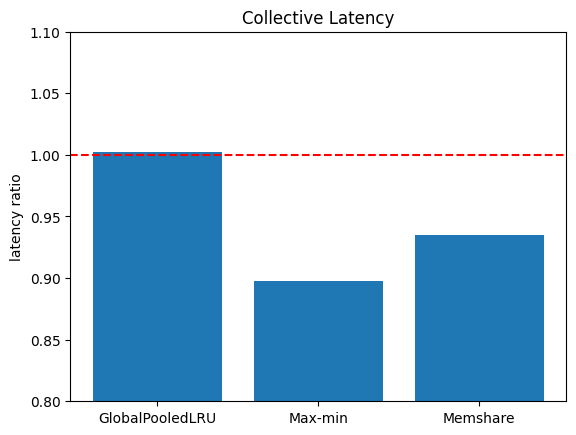

In [5]:
x = ["GlobalPooledLRU", "Max-min", "Memshare"]
y = coll_lat
plt.title("Collective Latency")
plt.ylabel("latency ratio")
plt.ylim(0.8,1.1)

plt.axhline(y=1, color='red', linestyle='--', label='Threshold')
plt.bar(x, y)

<BarContainer object of 3 artists>

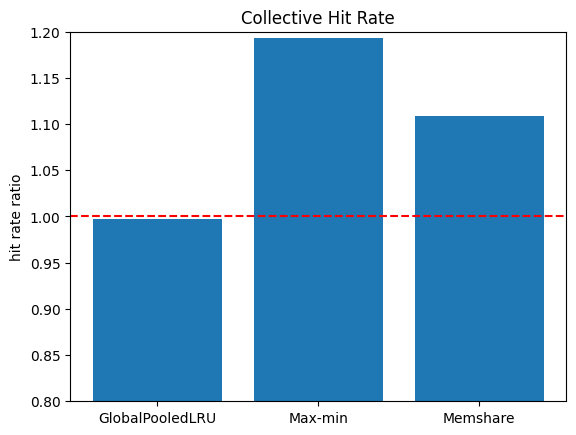

In [6]:
x = ["GlobalPooledLRU", "Max-min", "Memshare"]
y = coll_hr
plt.title("Collective Hit Rate")
plt.ylabel("hit rate ratio")
plt.ylim(0.8, 1.2)

plt.axhline(y=1, color='red', linestyle='--', label='Threshold')
plt.bar(x, y)

['18', '5935'] [0.9957270592243003, 1.004869393930002]


<BarContainer object of 2 artists>

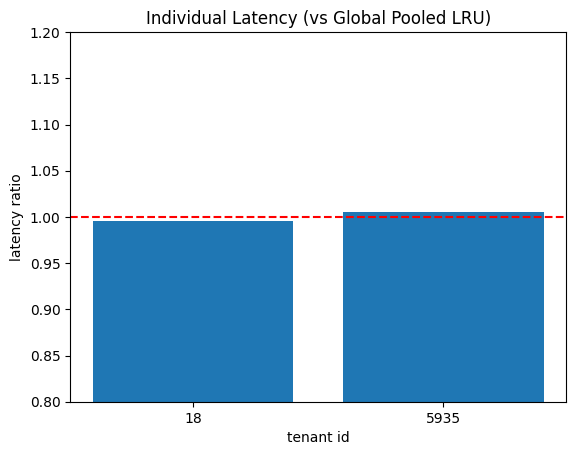

In [7]:
x = [str(t) for t in tntids]
y = ind_lat[0]
print(x, y)
plt.title("Individual Latency (vs Global Pooled LRU)")
plt.ylabel("latency ratio")
plt.xlabel("tenant id")
plt.ylim(0.8, 1.2)

plt.axhline(y=1, color='red', linestyle='--', label='Threshold')
plt.bar(x, y)

['18', '5935'] [1.011111111111111, 0.9941792782305006]


<BarContainer object of 2 artists>

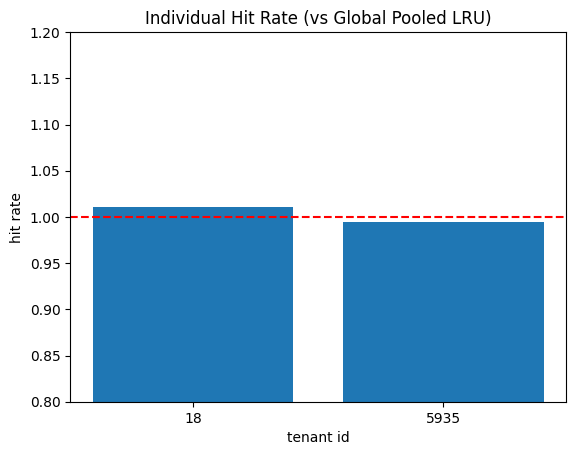

In [8]:
x = [str(t) for t in tntids]
y = ind_hr[0]
print(x, y)
plt.title("Individual Hit Rate (vs Global Pooled LRU)")
plt.ylabel("hit rate")
plt.xlabel("tenant id")
plt.ylim(0.8, 1.2)

plt.axhline(y=1, color='red', linestyle='--', label='Threshold')
plt.bar(x, y)

In [ ]:
x = [str(t) for t in tntids]
y = ind_lat[1]
print(x, y)
plt.title("Individual Latency (vs Max-min)")
plt.ylabel("latency ratio")
plt.xlabel("tenant id")
plt.ylim(0.8, 1.2)

plt.axhline(y=1, color='red', linestyle='--', label='Threshold')
plt.bar(x, y)

['18', '5935'] [0.994535519125683, 1.2467153284671533]


<BarContainer object of 2 artists>

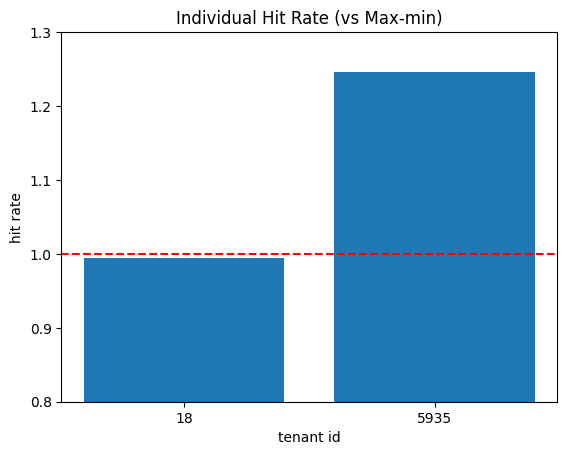

In [11]:
x = [str(t) for t in tntids]
y = ind_hr[1]
print(x, y)
plt.title("Individual Hit Rate (vs Max-min)")
plt.ylabel("hit rate")
plt.xlabel("tenant id")
plt.ylim(0.8, 1.3)

plt.axhline(y=1, color='red', linestyle='--', label='Threshold')
plt.bar(x, y)

In [ ]:
x = [str(t) for t in tntids]
y = ind_lat[2]
print(x, y)
plt.title("Individual Latency (vs Memshare)")
plt.ylabel("latency ratio")
plt.xlabel("tenant id")
plt.ylim(0.8, 1.2)

plt.axhline(y=1, color='red', linestyle='--', label='Threshold')
plt.bar(x, y)

['18', '5935'] [0.9837837837837838, 1.1401869158878504]


<BarContainer object of 2 artists>

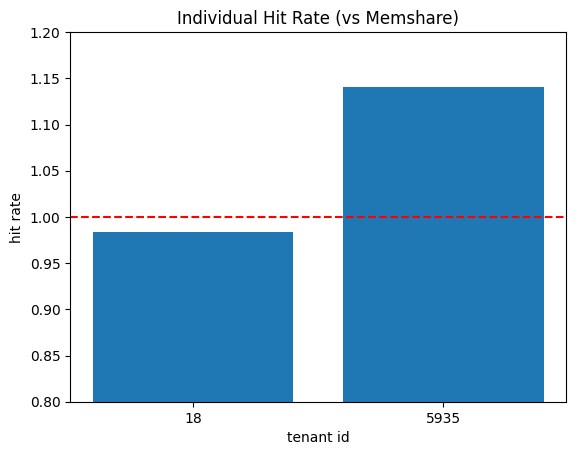

In [10]:
x = [str(t) for t in tntids]
y = ind_hr[2]
print(x, y)
plt.title("Individual Hit Rate (vs Memshare)")
plt.ylabel("hit rate")
plt.xlabel("tenant id")
plt.ylim(0.8, 1.2)

plt.axhline(y=1, color='red', linestyle='--', label='Threshold')
plt.bar(x, y)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
categories = ['GlobalPooledLRU', 'Max-min', 'Memshare']
values1 = [1.05, 1.06, 1.04]
values2 = [1.12, 1.18, 1.15]
values3 = [1.19, 1.27, 1.25]

# Width of each bar
bar_width = 0.25

# Create a bar chart with three sub-bars in each category
bar_positions1 = np.arange(len(categories))
bar_positions2 = [x + bar_width for x in bar_positions1]
bar_positions3 = [x + bar_width for x in bar_positions2]

plt.bar(bar_positions1, values1, width=bar_width,
        label='contention=0.5', color='blue')
plt.bar(bar_positions2, values2, width=bar_width,
        label='contention=0.8', color='orange')
plt.bar(bar_positions3, values3, width=bar_width,
        label='contention=0.95', color='green')

# Adding labels and title
plt.ylabel('hit rate ratio')
plt.title('Hit Rate Improvement vs Cache Contention')

# Set x-axis ticks and labels
plt.xticks([r + bar_width for r in range(len(categories))], categories)

# Show the legend
plt.legend()
plt.ylim(0.9, 1.3)
plt.axhline(y=1, color='red', linestyle='--', label='Threshold')
# Show the chart
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
categories = ['GlobalPooledLRU', 'Max-min', 'Memshare']
values1 = [0.983, 0.984, 0.989]
values2 = [0.972, 0.968, 0.974]
values3 = [0.954, 0.952, 0.958]

# Width of each bar
bar_width = 0.25

# Create a bar chart with three sub-bars in each category
bar_positions1 = np.arange(len(categories))
bar_positions2 = [x + bar_width for x in bar_positions1]
bar_positions3 = [x + bar_width for x in bar_positions2]

plt.bar(bar_positions1, values1, width=bar_width,
        label='latency=1s', color='blue')
plt.bar(bar_positions2, values2, width=bar_width,
        label='latency=3s', color='orange')
plt.bar(bar_positions3, values3, width=bar_width,
        label='latency=5s', color='green')

# Adding labels and title
plt.ylabel('latency ratio')
plt.title('Latency Improvement vs Additional Latency from Backing Store')

# Set x-axis ticks and labels
plt.xticks([r + bar_width for r in range(len(categories))], categories)

# Show the legend
plt.legend()
plt.ylim(0.9, 1.05)
plt.axhline(y=1, color='red', linestyle='--', label='Threshold')
# Show the chart
plt.show()